# GPT Example Increase Figure
Plots of how adding more examples affects GPT manually-engineered stepwise prompt performance across various datasets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.lines import Line2D
%matplotlib inline
from collections import defaultdict
from ast import literal_eval

In [2]:
# Read in the data
perf_files = {
    'pick_0_wr': 'pickle_no_examples_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_09May2023_with_relation_labels_performance.csv',
    'pick_0_wor': 'pickle_no_examples_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_09May2023_withOUT_relation_labels_performance.csv',
    'pick_2_wr': 'pickle_2_examples_few_shot_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_09May2023_with_relation_labels_performance.csv',
    'pick_2_wor': 'pickle_2_examples_few_shot_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_09May2023_withOUT_relation_labels_performance.csv',
    'pick_5_wr': 'pickle_5_examples_few_shot_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_09May2023_with_relation_labels_performance.csv',
    'pick_5_wor': 'pickle_5_examples_few_shot_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_09May2023_withOUT_relation_labels_performance.csv',
    'pick_10_wr': 'pickle_10_examples_few_shot_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_09May2023_with_relation_labels_performance.csv',
    'pick_10_wor': 'pickle_10_examples_few_shot_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_09May2023_withOUT_relation_labels_performance.csv'
}
perf_fullpath = '../data/baselines/all_benchmark_new_eval/pickle_automated_gpt_evals'

In [3]:
perf_dfs = {k: pd.read_csv(f'{perf_fullpath}/{v}') for k,v in perf_files.items()}

In [4]:
perf_dfs['pick_5_wr']

,precision,precision_CI,recall,recall_CI,F1,F1_CI
0,0.026639,"(0.007903699537557804, 0.04231618524707567)",0.064524,"(0.019618055555555555, 0.1111111111111111)",0.037445,"(0.011525812238389475, 0.06138932496075353)"


In [5]:
perf_dfs['pick_10_wr']

,precision,precision_CI,recall,recall_CI,F1,F1_CI
0,0.024464,"(0.00638730093915884, 0.0413522371045882)",0.067557,"(0.019599537928378902, 0.1278532608695651)",0.035611,"(0.009919402543626145, 0.05959946792787464)"


In [6]:
# Create combined performance df
perf_dict = defaultdict(list)
for name, df in perf_dfs.items():
    perf_dict['name'].append(name)
    perf_dict['F1'].append(df.loc[0, 'F1'])
    perf_dict['F1_CI'].append(df.loc[0, 'F1_CI'])
perfs_to_plot = pd.DataFrame.from_dict(perf_dict)

In [7]:
# Cast the CI column to two, one upper bound and one lower bound
tuple_col = perfs_to_plot['F1_CI'].apply(lambda x: literal_eval(x))
lower_bound = [t[0] for t in tuple_col]
upper_bound = [t[1] for t in tuple_col]
perfs_to_plot['lower_bound'] = lower_bound
perfs_to_plot['upper_bound'] = upper_bound

In [8]:
# Create a common name for the X-axis
perfs_to_plot['common_name'] = perfs_to_plot['name'].str.split('_').str[1:2].str.join('_')

In [9]:
# Add full dataset name
full_names = {'pick': 'PICKLE',
             'cdr': 'CDR',
             'bioinfer': 'BioInfer',
             'scierc': 'SciERC'}
perfs_to_plot['full_dset_name'] = [full_names[s.split('_')[0]] for s in perfs_to_plot['name']]

In [10]:
perfs_to_plot

,name,F1,F1_CI,lower_bound,upper_bound,common_name,full_dset_name
0,pick_0_wr,0.000000,"(0.0, 0.0)",0.000000,0.000000,0,PICKLE
1,pick_0_wor,0.012167,"(0.0, 0.025)",0.000000,0.025000,0,PICKLE
2,pick_2_wr,0.019428,"(0.0061139169472502804, 0.03321108183962669)",0.006114,0.033211,2,PICKLE
3,pick_2_wor,0.039470,"(0.019455759757483898, 0.05780872393113942)",0.019456,0.057809,2,PICKLE
4,pick_5_wr,0.037445,"(0.011525812238389475, 0.06138932496075353)",0.011526,0.061389,5,PICKLE
5,pick_5_wor,0.081328,"(0.04266128114688815, 0.11764705882352941)",0.042661,0.117647,5,PICKLE
6,pick_10_wr,0.035611,"(0.009919402543626145, 0.05959946792787464)",0.009919,0.059599,10,PICKLE
7,pick_10_wor,0.066776,"(0.031237113402061856, 0.09950248756218905)",0.031237,0.099502,10,PICKLE


In [11]:
# Arrange data to plot
wr_df = perfs_to_plot[perfs_to_plot['name'].str.contains('wr')]
wor_df = perfs_to_plot[perfs_to_plot['name'].str.contains('wor')]

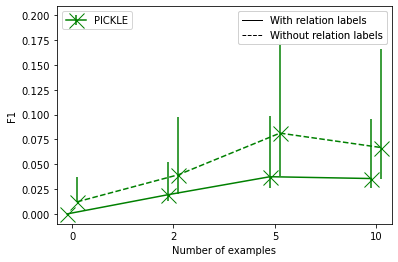

In [12]:
# Plot
fig, ax = plt.subplots()

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

for dset in perfs_to_plot['full_dset_name'].unique():
    dset_subset_wr = wr_df[wr_df['full_dset_name'] == dset]
    dset_subset_wor = wor_df[wor_df['full_dset_name'] == dset]
    ax.errorbar(dset_subset_wr['common_name'], dset_subset_wr['F1'],
                 [dset_subset_wr['lower_bound'],
                  dset_subset_wr['upper_bound']],
                 marker='x', ms=15, c='green', linestyle='solid',
                 transform=trans+offset(-5), label=dset)
    ax.errorbar(dset_subset_wor['common_name'], dset_subset_wor['F1'],
                 [dset_subset_wor['lower_bound'],
                  dset_subset_wor['upper_bound']],
                 marker='x', ms=15, c='green', linestyle='dashed',
                 transform=trans+offset(5), label=dset)
plt.xlabel('Number of examples')
plt.ylabel('F1')

# Keep only the solid line version of each model/training set combination
lines, labels = ax.get_legend_handles_labels()
keep_lines, keep_labs = [], []
for lin, lab in zip(lines, labels):
    if lab not in keep_labs:
        keep_labs.append(lab)
        keep_lines.append(lin)
legend1 = ax.legend(handles=keep_lines, loc='upper left')
# Dummy lines with NO entries, just to create the black style legend
dummy_lines = []
for linestyle, label in zip(['-', '--'],
                    ['With relation labels', 'Without relation labels']):
    dummy_lines.append(Line2D([0], [0], linestyle=linestyle, color='black',
                       linewidth=1, label=label))
legend2 = ax.legend(dummy_lines,
                    ['With relation labels', 'Without relation labels'])
ax.add_artist(legend1)
ax.add_artist(legend2)